In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
samp_rate = 2e6         #hz
pulse_duration = 0.002  #seconds
starting_freq = 5e3     #hz
ending_freq = 100e3     #hz

freqs = np.linspace(starting_freq,ending_freq,int(pulse_duration*samp_rate))
t_pulse = np.linspace(0,pulse_duration,int(pulse_duration*samp_rate))

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
pulse = np.zeros(len(freqs))
for i in range(0,len(freqs)):
    pulse[i] = np.sin(freqs[i]*t_pulse[i])

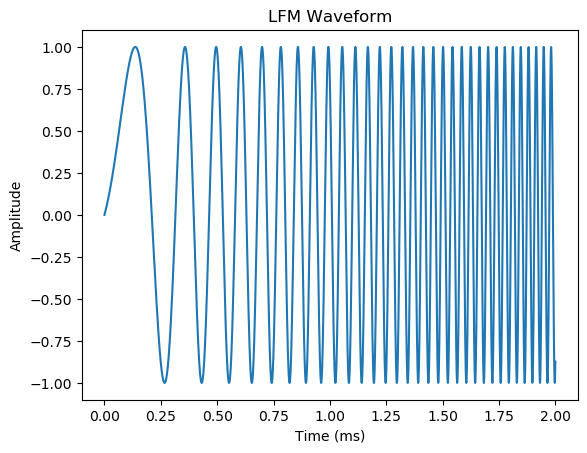

In [ ]:
plt.title("LFM Waveform")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.plot(t_pulse*1000, pulse);

In [ ]:
#pulse_train = np.concatenate([np.zeros(int(samp_rate*0.5)), pulse, np.zeros(int(samp_rate*2))])
pulse_train = np.concatenate([pulse, np.zeros(int(samp_rate*2))])
t_pulse_train = np.linspace(0,len(pulse_train)*(1/samp_rate), len(pulse_train))

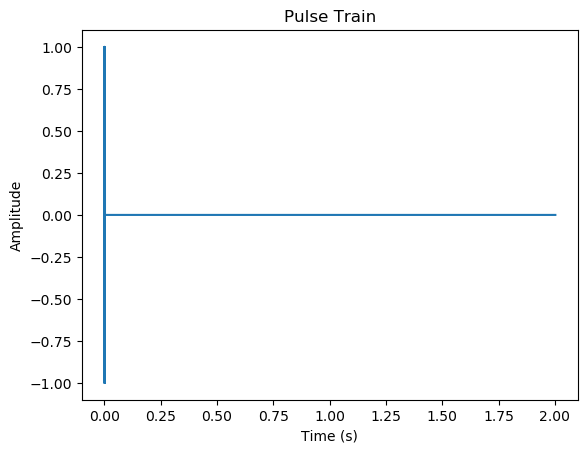

In [ ]:
plt.title("Pulse Train")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, pulse_train);

In [ ]:
reflected_pulse = pulse * 0.25 #+ (np.random.rand(len(pulse)) - .5) * .4
ret_pulse_train = pulse_train #+ (np.random.rand(len(pulse_train)) - 0.5) * 0.4
ret_pulse_train[2000000:2004000] = reflected_pulse;

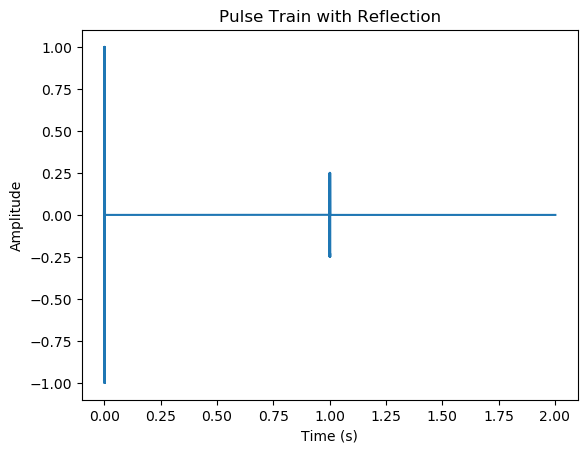

In [ ]:
plt.title("Pulse Train with Reflection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, ret_pulse_train);

In [ ]:
pulse_compression = np.convolve(np.flip(pulse), ret_pulse_train)
t_pulse_compression = np.linspace(0,len(pulse_compression)*(1/samp_rate), len(pulse_compression))

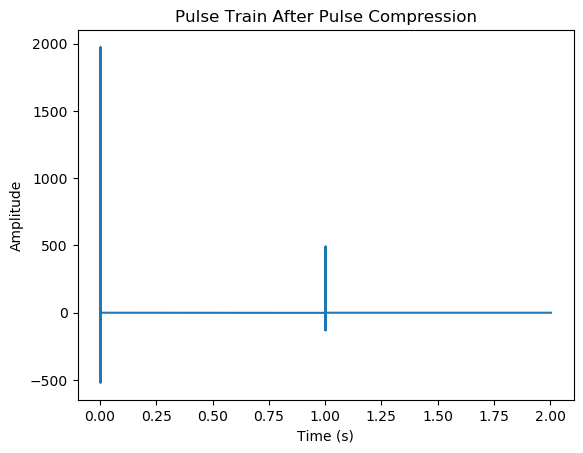

In [ ]:
plt.title("Pulse Train After Pulse Compression")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_compression, pulse_compression);

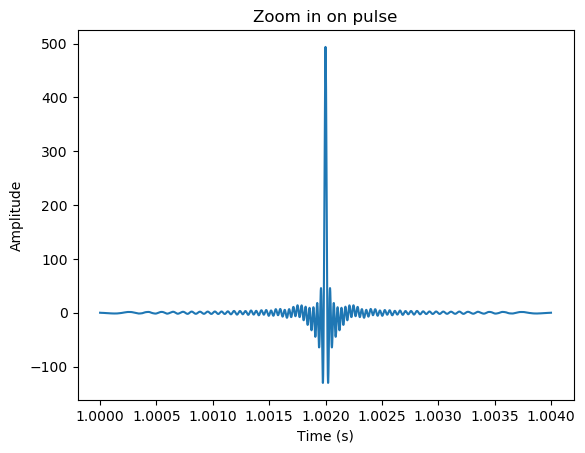

In [ ]:
plt.title("Zoom in on pulse")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_compression[2000000:2008000], pulse_compression[2000000:2008000]);

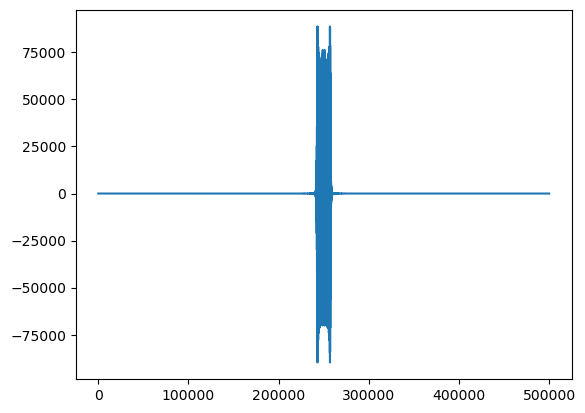

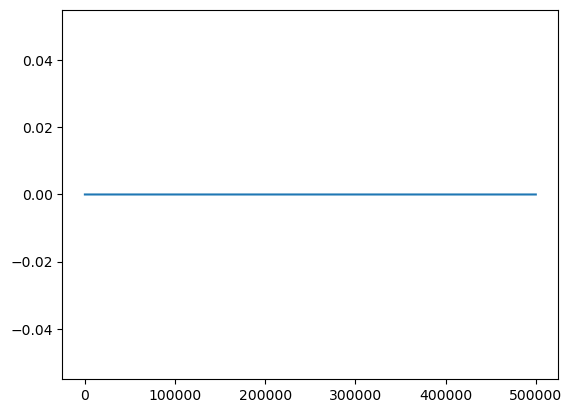

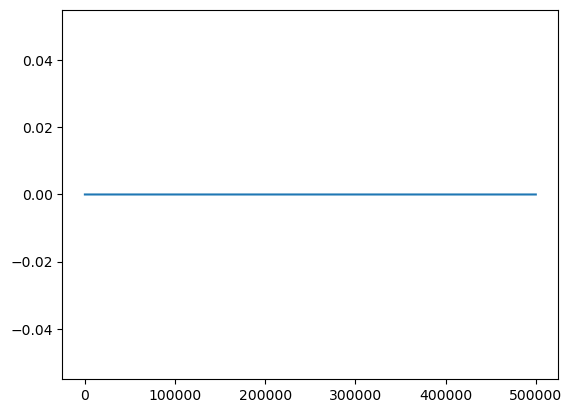

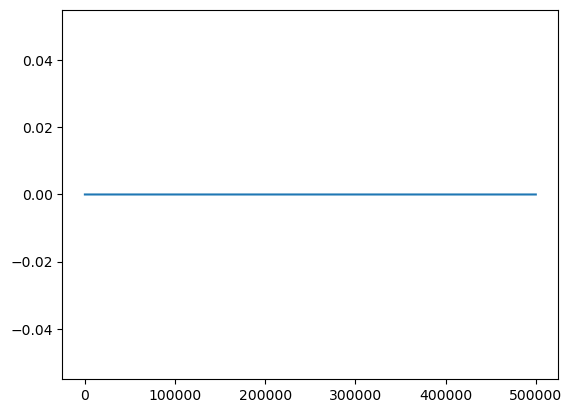

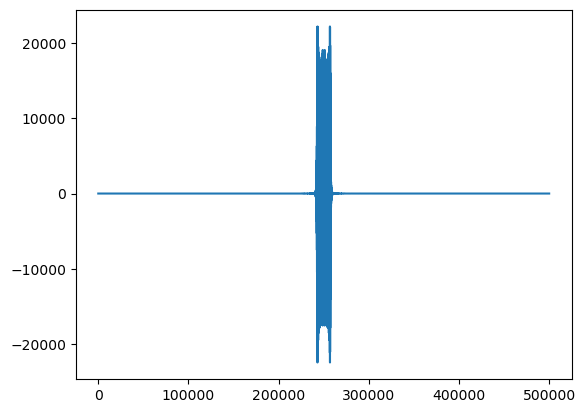

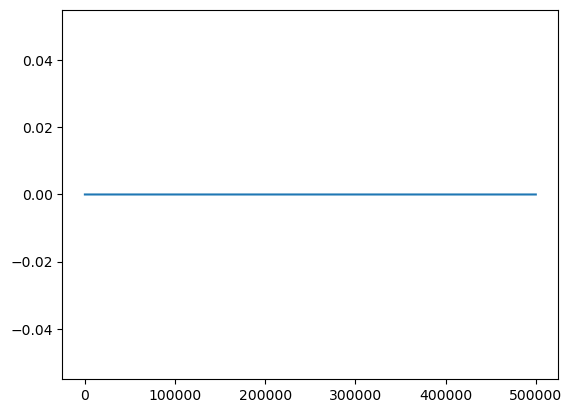

In [ ]:
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[0:500000]))); plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[500000:1000000]))); plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1000000:1500000]))); plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1500000:2000000]))); plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2000000:2500000]))); plt.show()
plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2500000:3000000]))); plt.show()

In [ ]:
import scipy.signal as signal

f, t, Sxx = signal.spectrogram(pulse_compression, samp_rate, nfft=4096)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()
